In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report

In [2]:
dataset_path = 'fd1 (1).csv'
data = pd.read_csv(dataset_path)

In [3]:
selected_features = ['Bust', 'waist', 'hip', 'sholders', 'slevers', 'size', 'Label']
X = data[selected_features]
y = data['Label']

In [4]:
print(X)

     Bust  waist   hip  sholders  slevers size  Label
0    36.0   31.0  37.0      15.0     23.0   XS      1
1    36.0   31.0  37.0      15.0     23.0   XS      2
2    36.0   31.0  37.0      15.0     23.0   XS      3
3    38.0   33.0  39.0      15.5     24.0    S      1
4    38.0   33.0  39.0      15.5     24.0    S      2
..    ...    ...   ...       ...      ...  ...    ...
990  49.5   42.5  50.5      18.5     25.5  XXL      1
991  50.0   42.5  50.5      18.5     25.5  XXL      2
992  50.5   42.5  50.5      18.5     25.5  XXL      3
993  51.0   42.5  50.5      18.5     25.5  XXL      1
994  51.5   42.5  50.5      18.5     25.5  XXL      2

[995 rows x 7 columns]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
#KNN

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [8]:
dataset_path = 'fd1 (1).csv'

data = pd.read_csv(dataset_path)

selected_features = ['Bust', 'waist', 'hip', 'sholders', 'slevers', 'size', 'Label']
X = data[selected_features]
y = data['Label']

X['size'] = X['size'].astype('category').cat.codes

X['slevers'] = X['slevers'].astype('category').cat.codes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Bust', 'waist', 'hip', 'sholders', 'slevers', 'size', 'Label']])
X_test_scaled = scaler.transform(X_test[['Bust', 'waist', 'hip', 'sholders', 'slevers', 'size', 'Label']])

X_train = pd.concat([pd.DataFrame(X_train_scaled, columns=['Bust', 'waist', 'hip', 'sholders', 'slevers', 'size', 'Label']),
                    X_train[['size']].reset_index(drop=True)], axis=1)

X_test = pd.concat([pd.DataFrame(X_test_scaled, columns=['Bust', 'waist', 'hip', 'sholders', 'slevers', 'size', 'Label']),
                   X_test[['size',]].reset_index(drop=True)], axis=1)


knn_model = KNeighborsClassifier(n_neighbors=3) 
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

In [9]:
a = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {a}")

KNN Accuracy: 1.0


In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00        70
           3       1.00      1.00      1.00        56

    accuracy                           1.00       199
   macro avg       1.00      1.00      1.00       199
weighted avg       1.00      1.00      1.00       199



No Skill: ROC AUC=0.500
KNN: ROC AUC=0.851


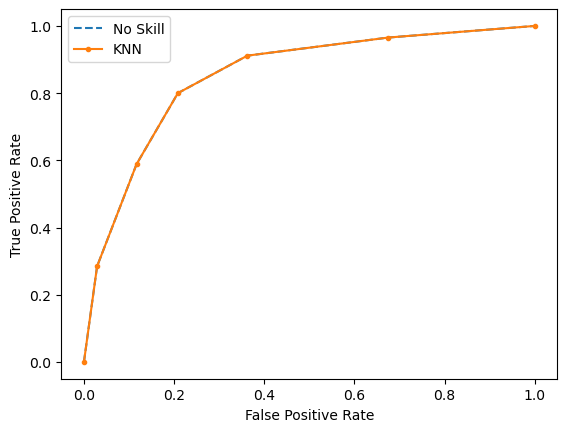

Logistic: f1=0.803 auc=0.856


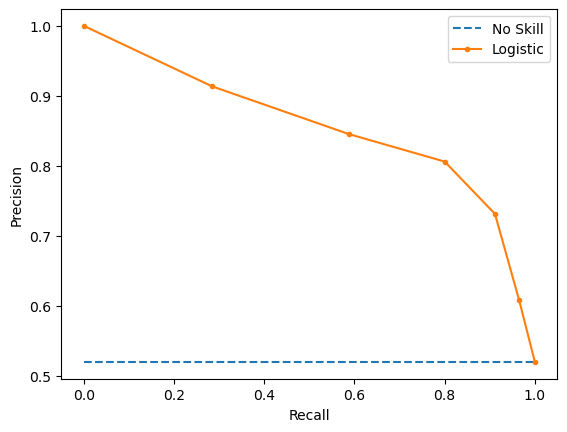

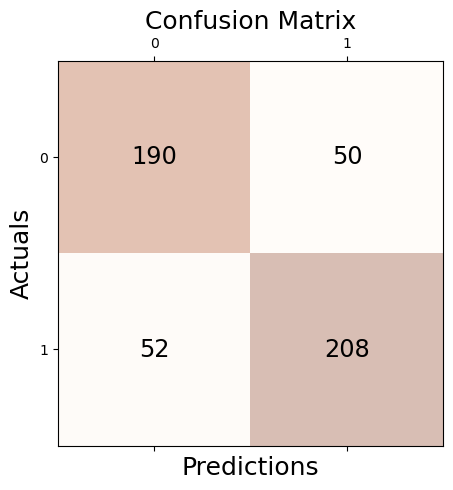

In [11]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import precision_recall_curve, f1_score, auc, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# generate 2 class dataset
knnfeatures, knnlabels = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
knn_features_train, knn_features_test, knn_label_train, knn_label_test = train_test_split(knnfeatures, knnlabels, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(knn_label_test))]
# fit a model
model=knn(n_neighbors=5)
model.fit(knn_features_train, knn_label_train)
# predict probabilities
KNN_probs = model.predict_proba(knn_features_test)
# keep probabilities for the positive outcome only
KNN_probs = KNN_probs[:, 1]
# calculate scores
KNN_prob_auc = roc_auc_score(knn_label_test, ns_probs)
KNN_auc = roc_auc_score(knn_label_test, KNN_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (KNN_prob_auc))
print('KNN: ROC AUC=%.3f' % (KNN_auc))
# calculate roc curves
KNN_fpr, KNN_tpr, _ = roc_curve(knn_label_test, ns_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(knn_label_test, KNN_probs)
# plot the roc curve for the model
pyplot.plot(KNN_fpr, KNN_tpr, linestyle='--', label='No Skill')
pyplot.plot(KNN_fpr, KNN_tpr, marker='.', label='KNN')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
KNN_Model_predict = model.predict(knn_features_test)
KNN_precision, KNN_recall, _ = precision_recall_curve(knn_label_test, KNN_probs)
KNN_f1, KNN_auc = f1_score(knn_label_test, KNN_Model_predict), auc(KNN_recall, KNN_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (KNN_f1, KNN_auc))
# plot the precision-recall curves
no_skill = len(knn_label_test[knn_label_test==1]) / len(knn_label_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(KNN_recall, KNN_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

KNN_Matrix = confusion_matrix(y_true=knn_label_test, y_pred=KNN_Model_predict)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(KNN_Matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(KNN_Matrix.shape[0]):
    for j in range(KNN_Matrix.shape[1]):
        ax.text(x=j, y=i,s=KNN_Matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0


In [13]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.0


In [14]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_knn)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.0


In [15]:
#SUPPORT VECTOR CLASSIFIER

In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# fit the SVC model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# predict probabilities
svc_probs = model.predict_proba(X_test)[:, 1]

# predict class labels
svc_predicted = model.predict(X_test)

# calculate scores
svc_auc = roc_auc_score(y_test, svc_probs)

svc_precision = precision_score(y_test, svc_predicted)
svc_recall = recall_score(y_test, svc_predicted)
svc_f1 = f1_score(y_test, svc_predicted)

print('SVC: ROC AUC=%.3f' % (svc_auc))

print('SVC: Precision=%.3f' % (svc_precision))
print('SVC: Recall=%.3f' % (svc_recall))
print('SVC: F1 Score=%.3f' % (svc_f1))

SVC: ROC AUC=0.900
SVC: Precision=0.826
SVC: Recall=0.858
SVC: F1 Score=0.842


In [17]:
b = accuracy_score(y_test, svc_predicted)
print('SVC: Accuracy=%.3f' % (b))

SVC: Accuracy=0.832


In [18]:
# Convert probabilities to binary class labels
svc_predicted_binary = (svc_probs >= 0.5).astype(int)

# Compute Mean Absolute Error
mae = accuracy_score(y_test, svc_predicted_binary)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.832


In [19]:
from sklearn.metrics import mean_squared_error

# Compute Mean Squared Error
mse = mean_squared_error(y_test, svc_probs)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.12535749026663712


In [20]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.35405859722175526


No Skill: ROC AUC=0.500
SVC: ROC AUC=0.897


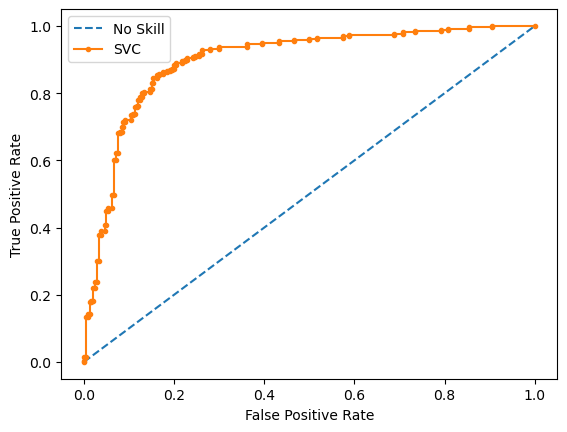

SVC: f1=0.851 auc=0.882


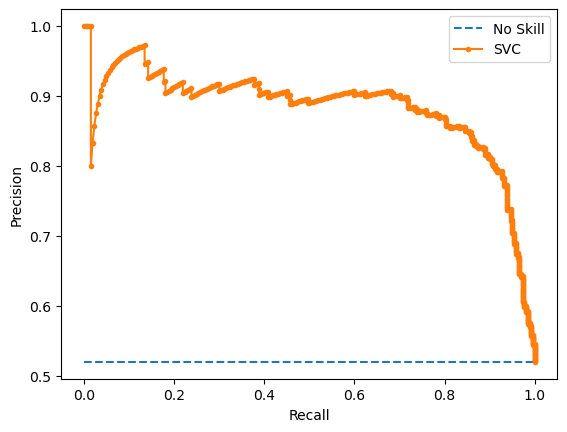

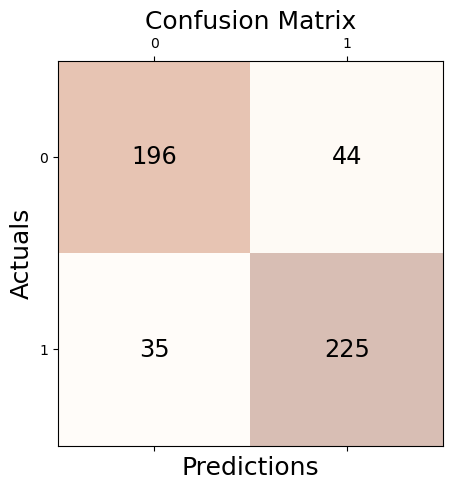

In [21]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.svm import SVC
import matplotlib.pyplot as plt
# generate 2 class dataset
SVCFeatures, SVCLabels = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
SVCtrainFeatures, SVCtestfeatures, SVCtrainlabels, SVCtestlabels = train_test_split(SVCFeatures, SVCLabels, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(SVCtestlabels))]
# fit a model
svcmodel=SVC(kernel='rbf', random_state=0,probability=True)
svcmodel.fit(SVCtrainFeatures, SVCtrainlabels)
# predict probabilities
svc_probs = svcmodel.predict_proba(SVCtestfeatures)
# keep probabilities for the positive outcome only
svc_probs = svc_probs[:, 1]
# calculate scores
svc_prob_acc = roc_auc_score(SVCtestlabels, ns_probs)
svc_auc = roc_auc_score(SVCtestlabels, svc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (svc_prob_acc))
print('SVC: ROC AUC=%.3f' % (svc_auc))
# calculate roc curves
svc_fpr, svc_tpr, _ = roc_curve(SVCtestlabels, ns_probs)
sv_fpr, sv_tpr, _ = roc_curve(SVCtestlabels, svc_probs)
# plot the roc curve for the model
pyplot.plot(svc_fpr, svc_tpr, linestyle='--', label='No Skill')
pyplot.plot(sv_fpr, sv_tpr, marker='.', label='SVC')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

svcmodelpredict = svcmodel.predict(SVCtestfeatures)
svc_precision, svc_recall, _ = precision_recall_curve(SVCtestlabels, svc_probs)
svc_f1, svc_auc = f1_score(SVCtestlabels, svcmodelpredict), auc(svc_recall, svc_precision)
# summarize scores
print('SVC: f1=%.3f auc=%.3f' % (svc_f1, svc_auc))
# plot the precision-recall curves
no_skill = len(SVCtestlabels[SVCtestlabels==1]) / len(SVCtestlabels)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(svc_recall, svc_precision, marker='.', label='SVC')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

svc_con_matrix = confusion_matrix(y_true=SVCtestlabels, y_pred=svcmodelpredict)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(svc_con_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(svc_con_matrix.shape[0]):
    for j in range(svc_con_matrix.shape[1]):
        ax.text(x=j, y=i,s=svc_con_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

svcmodelpredict = svcmodel.predict(SVCtestfeatures)
svc_con_matrix = confusion_matrix(y_true=SVCtestlabels, y_pred=svcmodelpredict)

In [22]:
#RANDOM FOREST

In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
c = accuracy_score(y_test, y_pred)
print("Accuracy:", c)


Accuracy: 0.8433333333333334


In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8145695364238411
Recall: 0.8661971830985915
F1 Score: 0.8395904436860069


ROC AUC Score: 0.905761217948718


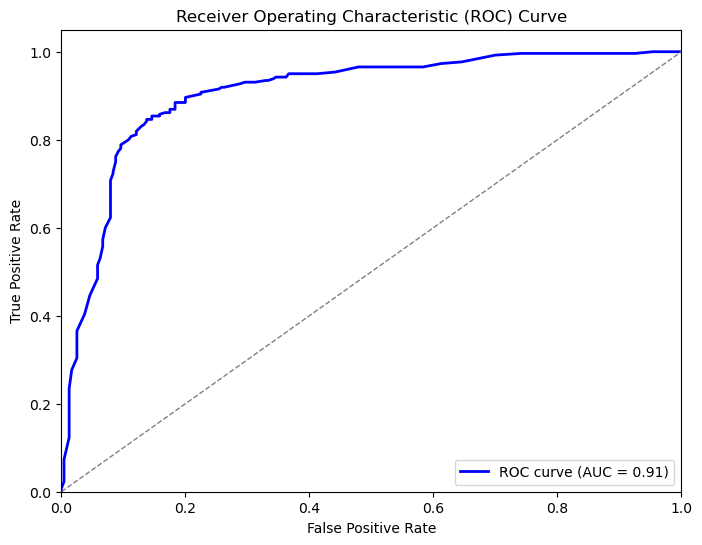

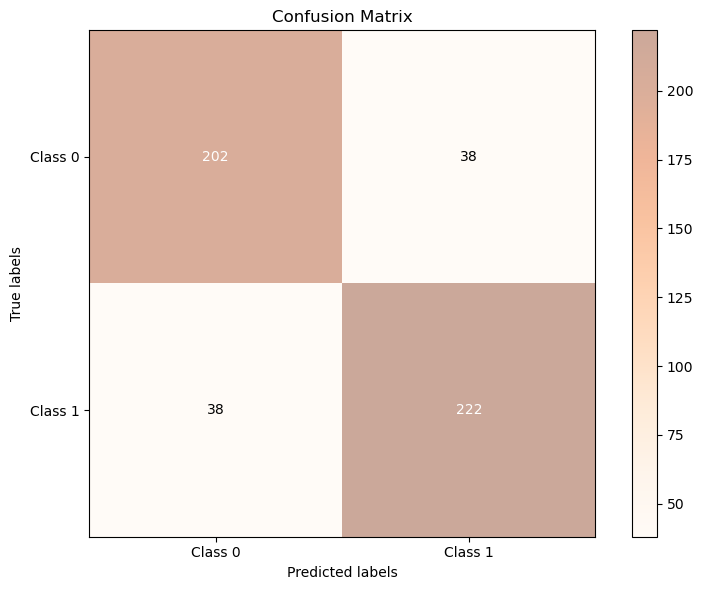

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Generate 2-class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict probabilities on the test set
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Predict labels on the test set
y_pred = rf_classifier.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Oranges,alpha=0.4)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])

# Fill the matrix with values
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error

# Predict probabilities for class 1
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions
y_pred_binary = (y_probs >= 0.5).astype(int)

# Compute Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred_binary)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.15


In [27]:
from sklearn.metrics import mean_squared_error

# Predict probabilities for class 1
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Compute Mean Squared Error
mse = mean_squared_error(y_test, y_probs)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.1167448


In [28]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.34167938187722124


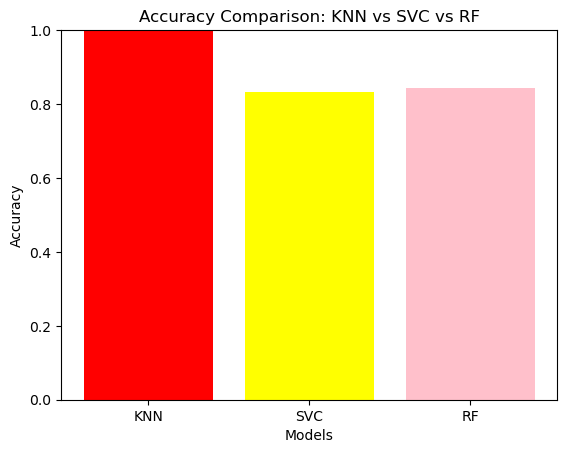

In [30]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
labels = ['KNN', 'SVC',"RF"]
accuracies = [a, b,c]

plt.bar(labels, accuracies, color=['Red', 'yellow','pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: KNN vs SVC vs RF')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1
plt.show()

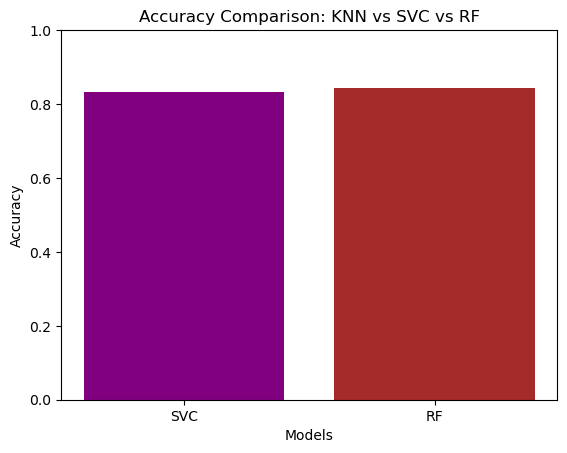

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
labels = ['SVC',"RF"]
accuracies = [b,c]

plt.bar(labels, accuracies, color=['purple', 'brown'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: KNN vs SVC vs RF')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1
plt.show()

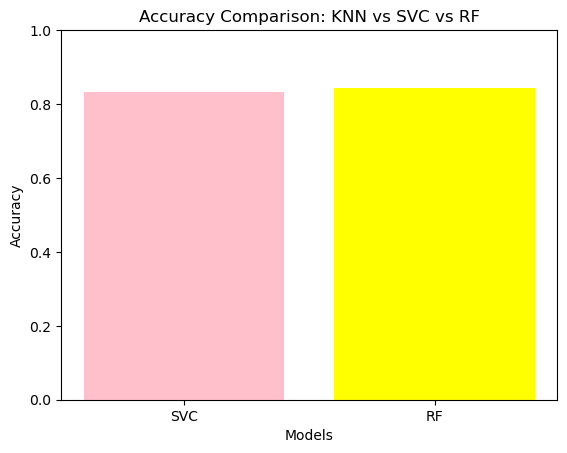

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
labels = ['SVC',"RF"]
accuracies = [b,c]

plt.bar(labels, accuracies, color=['pink', 'yellow'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: KNN vs SVC vs RF')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1
plt.show()

In [36]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# fit the SVC model
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# predict probabilities
svc_probs = model.predict_proba(X_test)[:, 1]

# predict class labels
svc_predicted = model.predict(X_test)

# calculate scores
b1 = accuracy_score(y_test, svc_predicted)
print('SVC: Accuracy=%.3f' % (b))


SVC: Accuracy=0.832


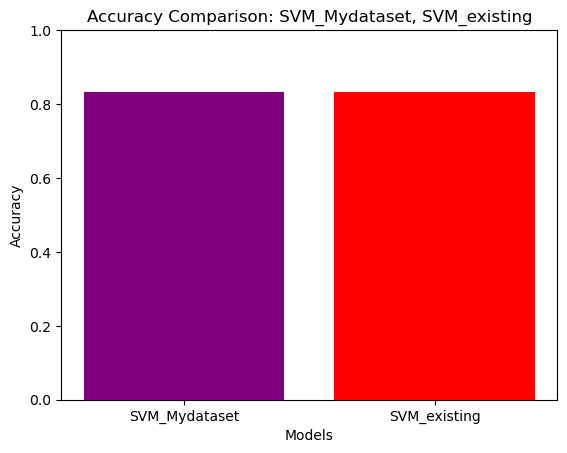

In [37]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
labels = ['SVM_Mydataset', 'SVM_existing']
accuracies = [b,b1]

plt.bar(labels, accuracies, color=['purple', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: SVM_Mydataset, SVM_existing')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1
plt.show()

In [38]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
c1 = accuracy_score(y_test, y_pred)
print("Accuracy:", c1)

Accuracy: 0.8433333333333334


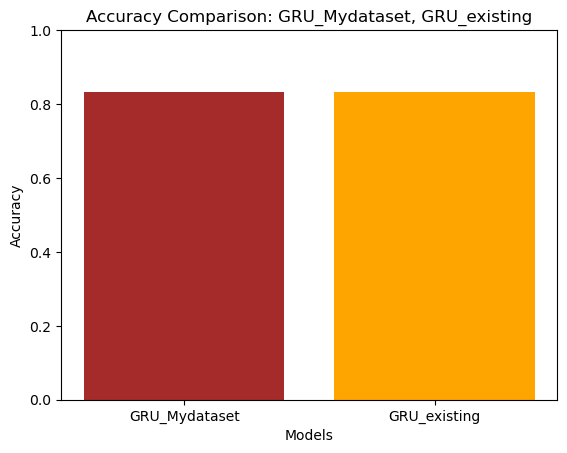

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
labels = ['GRU_Mydataset', 'GRU_existing']
accuracies = [b,b1]

plt.bar(labels, accuracies, color=['brown', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: GRU_Mydataset, GRU_existing')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1
plt.show()